In [8]:
import pandas as pd
train_stop = pd.read_csv('../data/curated/train_distance_duration.csv')
school = pd.read_csv('../data/curated/school_distance_duration.csv')
mall = pd.read_csv('../data/curated/mall_distances_durations(final).csv')
park = pd.read_csv('../data/curated/park_distances_durations(final).csv')
CBD = pd.read_csv('../data/curated/cbd_distances_durations(final).csv')
rent = pd.read_csv('../rent_data/rent_cleaned.csv')
population_growth = pd.read_csv('../data/curated/population_postcode_SA2.csv')
affluence = pd.read_csv('../data/curated/affluence.csv')

In [9]:
rent = rent.rename(columns={'listingSlug':'rent_address'})
rent_1bathroom = rent[rent.bathrooms == 1]
rent_2bathroom = rent[rent.bathrooms == 2]
rent_3bathroom = rent[rent.bathrooms == 3]
rent_4bathroom = rent[rent.bathrooms == 4]
rent_bathroom = rent[rent.bathrooms > 4]
rent_1bedroom = rent[rent.bedrooms == 1]
rent_2bedroom = rent[rent.bedrooms == 2]
rent_3bedroom = rent[rent.bedrooms == 3]
rent_4bedroom = rent[rent.bedrooms == 4]
rent_bedroom = rent[rent.bedrooms > 5]

In [10]:
rent_1car = rent[rent.carspaces == 1]
rent_2car = rent[rent.carspaces == 2]
rent_car = rent[rent.carspaces > 2]
print(rent_1car.shape)
print(rent_2car.shape)
print(rent_car.shape)

(701, 14)
(282, 14)
(45, 14)


Inverse index

In [11]:
park["min_duration"]=1/(park["min_duration"]/60)
mall["min_duration"]=1/(mall["min_duration"]/60)
school["min_duration"]=1/(school["min_duration"]/60)
train_stop["min_duration"]=1/(train_stop["min_duration"]/60)
CBD["min_duration"]=1/(CBD["min_duration"]/60)

In [12]:
park["min_distance"]=1/park["min_distance"]
mall["min_distance"]=1/mall["min_distance"]
school["min_distance"]=1/school["min_distance"]
train_stop["min_distance"]=1/train_stop["min_distance"]
CBD["min_distance"]=1/CBD["min_distance"]

Rename Column name

In [13]:
school = school.rename(columns={'min_distance':'school_distance(m)', 'min_duration':'school_duration(min)'})
mall = mall.rename(columns={'min_distance':'mall_distance(m)', 'min_duration':'mall_duration(min)'})
park = park.rename(columns={'min_distance':'park_distance(m)', 'min_duration':'park_duration(min)'})
train_stop = train_stop.rename(columns={'min_distance':'train_stop_distance(m)', 'min_duration':'train_stop_duration(min)'})
population_growth = population_growth.rename(columns={'Postcode':'postcode','average change %':'population_growth_rate'})
affluence = affluence.rename(columns={'average':'weekly_income'})
CBD = CBD.rename(columns={'min_distance':'CBD_distance(m)', 'min_duration':'CBD_duration(min)'})

Calculate average of diatance and duration

In [14]:
school = school[['postcode', 'school_distance(m)', 'school_duration(min)']].groupby('postcode').mean()
school = school.reset_index(drop=False)
mall = mall[['postcode', 'mall_distance(m)', 'mall_duration(min)']].groupby('postcode').mean()
mall = mall.reset_index(drop=False)
park = park[['postcode', 'park_distance(m)', 'park_duration(min)']].groupby('postcode').mean()
park = park.reset_index(drop=False)
CBD = CBD[['postcode', 'CBD_distance(m)', 'CBD_duration(min)']].groupby('postcode').mean()
CBD = CBD.reset_index(drop=False)
train_stop = train_stop[['postcode', 'train_stop_distance(m)', 'train_stop_duration(min)']].groupby('postcode').mean()
train_stop = train_stop.reset_index(drop=False)

Merge each external feature with mean value

In [15]:
rent_school = pd.merge(rent_2bedroom, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population_growth_rate']],affluence[['postcode','weekly_income']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
train_cbd = pd.merge(train_stop, CBD, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_cbd, how='inner', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='inner', on='postcode')

In [16]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)

(553, 16)
(144, 5)
(553, 20)
(553, 24)
(348, 26)


In [17]:
external_feature

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,...,mall_distance(m),mall_duration(min),park_distance(m),park_duration(min),train_stop_distance(m),train_stop_duration(min),CBD_distance(m),CBD_duration(min),population_growth_rate,weekly_income
0,4,450.0,VIC,ApartmentUnitFlat,1,2,2,Melbourne Region,MONTMORENCY,3094,...,0.000280,0.130862,0.000300,0.163854,0.000041,0.027942,0.000038,0.025164,1.002906,1147.014067
1,9,595.0,VIC,ApartmentUnitFlat,2,2,1,Melbourne Region,BRIGHTON,3186,...,0.000196,0.107630,0.000461,0.245778,0.000080,0.047606,0.000096,0.055790,1.004702,1503.768780
2,135,650.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,BRIGHTON,3186,...,0.000196,0.107630,0.000461,0.245778,0.000080,0.047606,0.000096,0.055790,1.004702,1503.768780
3,269,525.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,BRIGHTON,3186,...,0.000196,0.107630,0.000461,0.245778,0.000080,0.047606,0.000096,0.055790,1.004702,1503.768780
4,544,540.0,VIC,ApartmentUnitFlat,2,2,1,Melbourne Region,BRIGHTON,3186,...,0.000196,0.107630,0.000461,0.245778,0.000080,0.047606,0.000096,0.055790,1.004702,1503.768780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,981,310.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,HEATHERTON,3202,...,0.000282,0.132042,0.000381,0.151149,0.000039,0.026785,0.000042,0.028977,1.017813,1051.433333
344,1035,450.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,DINGLEY VILLAGE,3172,...,0.000303,0.214556,0.000388,0.178170,0.000031,0.025021,0.000032,0.024580,1.000793,800.675256
345,1093,500.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,SPRINGVALE,3171,...,0.000308,0.146698,0.000139,0.072921,0.000033,0.028895,0.000032,0.028085,1.009888,651.466709
346,1186,480.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,PARKVILLE,3052,...,0.000421,0.223195,0.000361,0.165607,0.000241,0.131720,0.000130,0.071959,1.017541,860.088106


In [18]:
external_feature.iloc[:,1:].to_csv('../data/curated/feature_selection.csv')

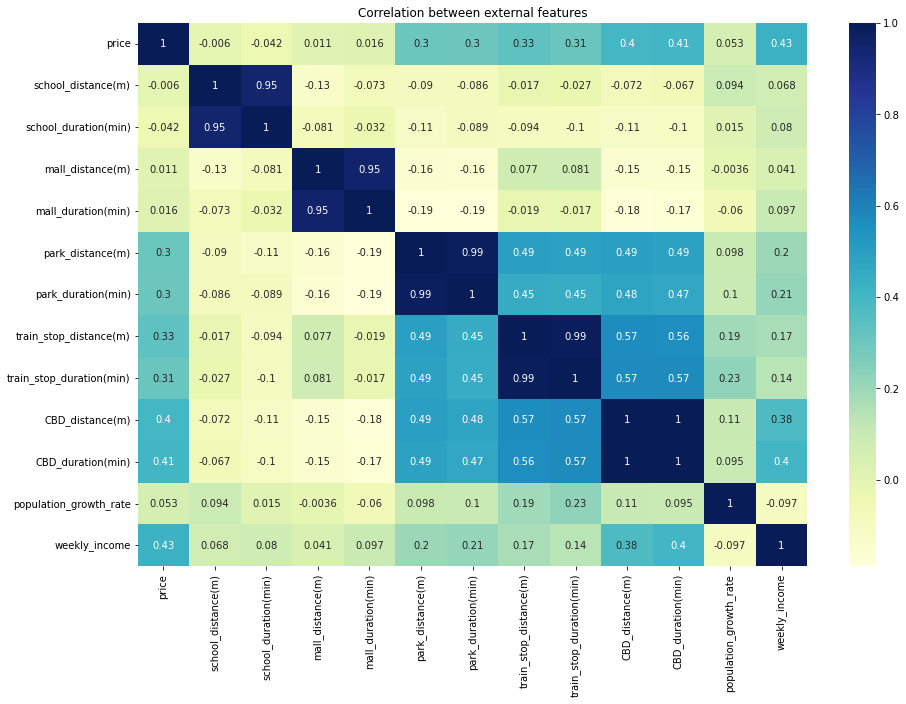

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)","CBD_distance(m)","CBD_duration(min)",'population_growth_rate','weekly_income']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features")
#plt.savefig("../plots/exteral_correlation.png")
plt.show()